## EDA Terrorism
### Rowan Amr Othman 

Project Description

Perform EDA on dataset 'Global Terrorism'.

As a security/defense analyst, try to find out the hot zone of terrorism.
What all security issues and insights you can derive by EDA? 
You can choose any of the tool of your choice.

## Importing Libraries and dataset files

In [154]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import math

In [50]:
df = pd.read_excel("Rglobalterrorismdb_0718dist.xlsx")

In [51]:
df = pd.DataFrame(df)
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaT,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [52]:
columns = df.columns
print(columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [53]:
df.describe()

,eventid,iyear,imonth,iday,extended,resolution,country,region,latitude,longitude,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,2220,181691.000000,181691.000000,177135.000000,1.771340e+05,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,1995-11-04 02:07:47.027027072,131.968501,7.160938,23.498343,-4.586957e+02,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,1970-03-08 00:00:00,4.000000,1.000000,-53.154613,-8.618590e+07,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,1988-05-08 12:00:00,78.000000,5.000000,11.510046,4.545640e+00,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,1996-04-26 12:00:00,98.000000,6.000000,31.467463,4.324651e+01,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,2006-09-08 00:00:00,160.000000,10.000000,34.685087,6.871033e+01,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,2016-01-11 00:00:00,1004.000000,12.000000,74.633553,1.793667e+02,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,NaN,112.414535,2.933408,18.569242,2.047790e+05,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325


According to the perceding info, the dataset's starts from 1970 till 2017


In [54]:
df.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaT   
1       197000000002   1970       0     0        NaN         0        NaT   
2       197001000001   1970       1     0        NaN         0        NaT   
3       197001000002   1970       1     0        NaN         0        NaT   
4       197001000003   1970       1     0        NaN         0        NaT   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaT   
181687  201712310029   2017      12    31        NaN         0        NaT   
181688  201712310030   2017      12    31        NaN         0        NaT   
181689  201712310031   2017      12    31        NaN         0        NaT   
181690  201712310032   2017      12    31        NaN         0        NaT   

        country         country_txt  region

Due to the massive number of NAN values it shows that it requires to be investigated 

In [55]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

## Cleaning dataset

In [56]:
#defining columns
for i in columns:
    print(i, end = ', ')

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [57]:
df2 = df[['eventid', 'iyear', 'iday','country_txt', 'region_txt', 'city', 'latitude', 'longitude','attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound' ]]

In [58]:
df2.rename(columns ={'eventid':'EventID','iyear':'Year', 'imonth':'Month', 'iday':'Day', 'region_txt':'Region','latitude':'Latitude', 'longitude':'Longitude','provstate':'State','country_txt':'Country','attacktype':'AttackNO',
                    
                    'attacktype1_txt':'Attackingtype1_txt', 'targtype1':'Maintarget', 'targtsubtype1_txt':'Subtarget','natlty1_txt':'Nationality','gname':'Gang','weaptype1_txt':'Weapon', 'nkill': 'Killed', 'nwound': 'Wounded'}, inplace = True)

C:\Users\rowan.amr\AppData\Local\Temp\ipykernel_13364\2732670909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns ={'eventid':'EventID','iyear':'Year', 'imonth':'Month', 'iday':'Day', 'region_txt':'Region','latitude':'Latitude', 'longitude':'Longitude','provstate':'State','country_txt':'Country','attacktype':'AttackNO',


In [59]:
#Adding column including wounded and kills 

df2['Total loss'] = df2['Killed'] + df2['Wounded']

C:\Users\rowan.amr\AppData\Local\Temp\ipykernel_13364\2938544604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total loss'] = df2['Killed'] + df2['Wounded']


In [60]:
df2.columns

Index(['EventID', 'Year', 'Day', 'Country', 'Region', 'city', 'Latitude',
       'Longitude', 'attacktype1', 'Attackingtype1_txt', 'Maintarget',
       'targtype1_txt', 'Nationality', 'Gang', 'Weapon', 'Killed', 'Wounded',
       'Total loss'],
      dtype='object')

In [61]:
#defining nulls
df2.isnull().sum()

EventID                   0
Year                      0
Day                       0
Country                   0
Region                    0
city                    435
Latitude               4556
Longitude              4557
attacktype1               0
Attackingtype1_txt        0
Maintarget                0
targtype1_txt             0
Nationality            1559
Gang                      0
Weapon                    0
Killed                10313
Wounded               16311
Total loss            16874
dtype: int64

In [62]:
df2.isnull().sum().sum()


54605

In [63]:
df2['Nationality'] = df2['Nationality'].fillna('NA')
df2['city']=df2['city'].fillna('NA')

df2['Killed'] = df2['Killed'].fillna(0)
df2['Wounded'] = df2['Wounded'].fillna(0) 
df2['Latitude'] = df2['Latitude'].fillna(0)
df2['Longitude'] = df2['Longitude'].fillna(0)


C:\Users\rowan.amr\AppData\Local\Temp\ipykernel_13364\975973892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Nationality'] = df2['Nationality'].fillna('NA')
C:\Users\rowan.amr\AppData\Local\Temp\ipykernel_13364\975973892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['city']=df2['city'].fillna('NA')
C:\Users\rowan.amr\AppData\Local\Temp\ipykernel_13364\975973892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [64]:
df2.isnull().sum()

EventID                   0
Year                      0
Day                       0
Country                   0
Region                    0
city                      0
Latitude                  0
Longitude                 0
attacktype1               0
Attackingtype1_txt        0
Maintarget                0
targtype1_txt             0
Nationality               0
Gang                      0
Weapon                    0
Killed                    0
Wounded                   0
Total loss            16874
dtype: int64

In [65]:
df2.head()

,EventID,Year,Day,Country,Region,city,Latitude,Longitude,attacktype1,Attackingtype1_txt,Maintarget,targtype1_txt,Nationality,Gang,Weapon,Killed,Wounded,Total loss
0,197000000001,1970,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,14,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,1.0
1,197000000002,1970,0,Mexico,North America,Mexico city,19.371887,-99.086624,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.0,0.0,0.0
2,197001000001,1970,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,10,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,1.0
3,197001000002,1970,0,Greece,Western Europe,Athens,37.997490,23.762728,3,Bombing/Explosion,7,Government (Diplomatic),United States,Unknown,Explosives,0.0,0.0,NaN
4,197001000003,1970,0,Japan,East Asia,Fukouka,33.580412,130.396361,7,Facility/Infrastructure Attack,7,Government (Diplomatic),United States,Unknown,Incendiary,0.0,0.0,NaN


In [67]:
df2.describe()

,EventID,Year,Day,Latitude,Longitude,attacktype1,Maintarget,Killed,Wounded,Total loss
count,1.816910e+05,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,164817.000000
mean,2.002705e+11,2002.638997,15.505644,22.909109,-4.471911e+02,3.247547,8.439719,2.266860,2.883296,5.296128
std,1.325957e+09,13.259430,8.814045,18.699442,2.021946e+05,1.915772,6.653838,11.227057,34.309747,42.069023
min,1.970000e+11,1970.000000,0.000000,-53.154613,-8.618590e+07,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,8.000000,9.518645,1.231572e+00,2.000000,3.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,15.000000,31.126646,4.314357e+01,3.000000,4.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,23.000000,34.538561,6.835734e+01,3.000000,14.000000,2.000000,2.000000,4.000000
max,2.017123e+11,2017.000000,31.000000,74.633553,1.793667e+02,9.000000,22.000000,1570.000000,8191.000000,9574.000000


Noted that the dataset entails range between 1970 and 2017
Max wounded and kills are 9574
Max wounded is 9181
Max kills is 1570

### Data Visualization

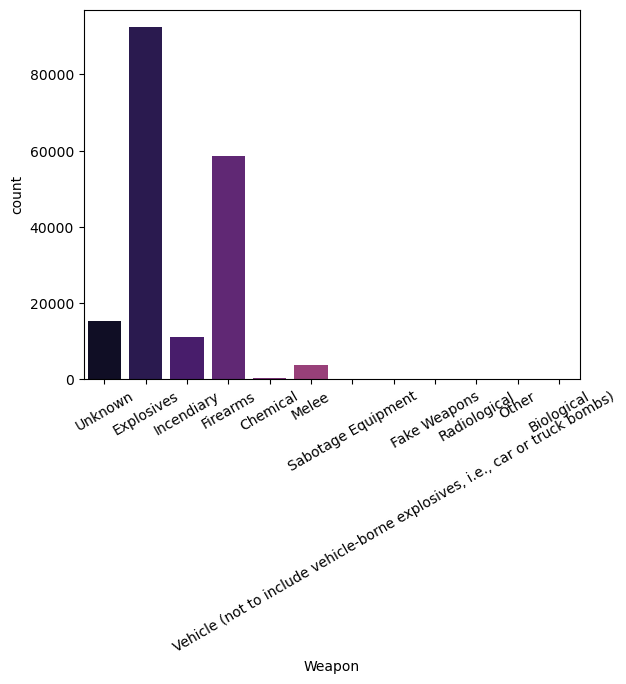

In [83]:
color1 = plt.colormaps()[0]
sb.countplot(data = df2, x= 'Weapon',palette = color1);
plt.xticks(rotation = 30);

### According to the preceding bar plot the  most repeated Weapon was Explosives 

In [242]:
df17 = df2[df2['Year'] == 2014]

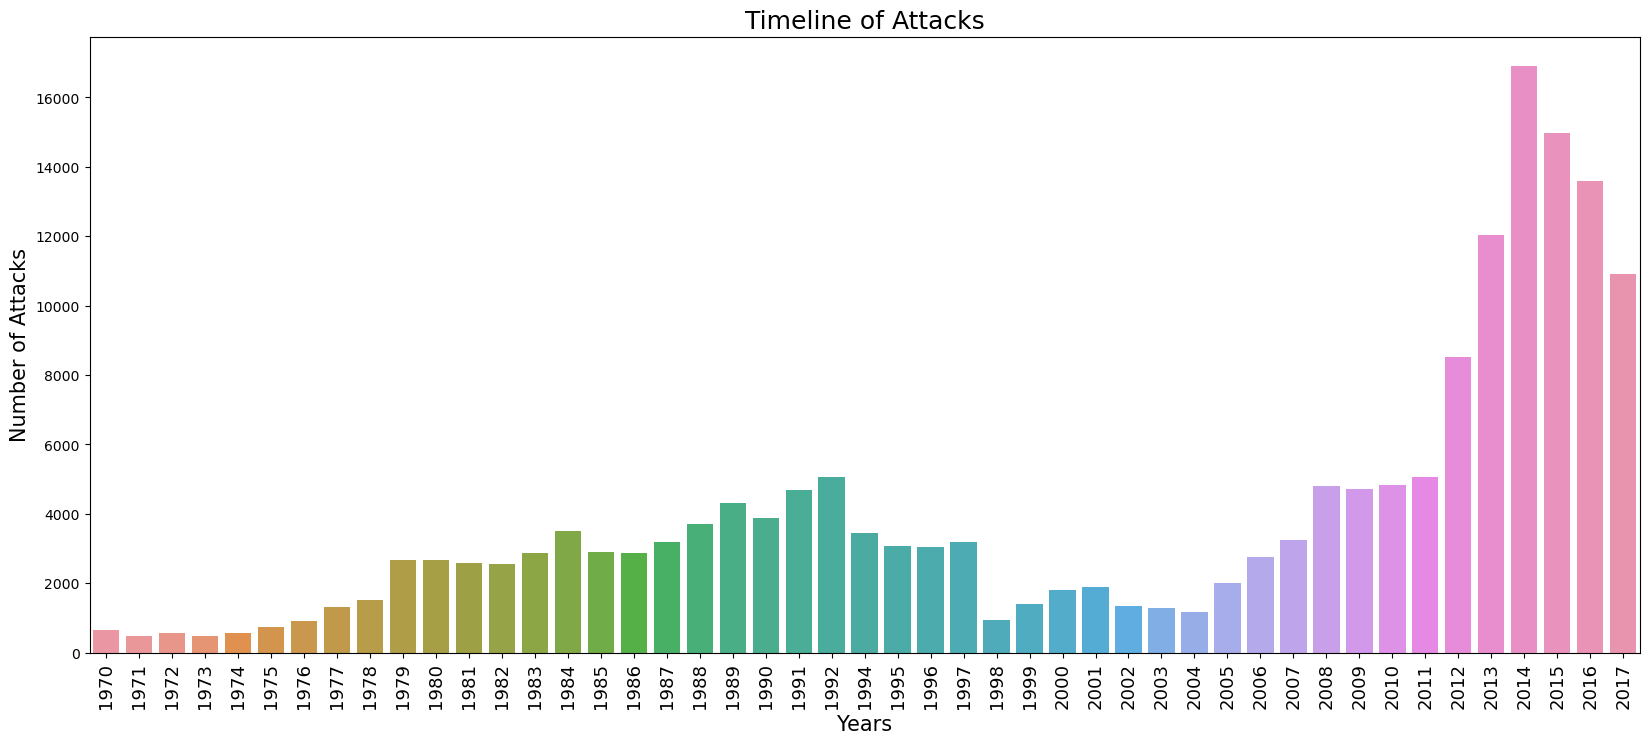

In [173]:
plt.figure(figsize = (20,8))
sb.countplot(data  = df2, x = df2['Year'] );
plt.xticks(rotation = 90, fontsize = 13);
plt.xlabel('Years', fontsize = 15);
plt.ylabel('Number of Attacks', fontsize = 15);
plt.title ('Timeline of Attacks',fontsize = 18);


### The most year that has accidents is 2014 and the least one is 1970

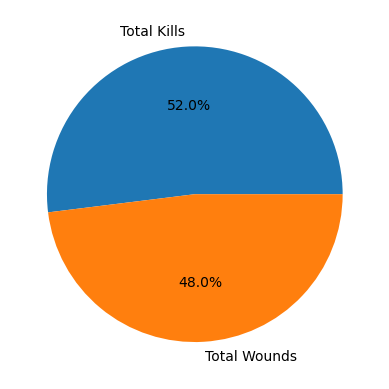

In [252]:
kills = df17['Killed'].sum()
colorpie = plt.colormaps()[5]
wounds = df17['Wounded'].sum()
plt.pie([kills, wounds], labels = ['Total Kills', 'Total Wounds'], autopct = '%1.1f%%');


### In 2014 (52% of total loss are killed and the rest are wounds)

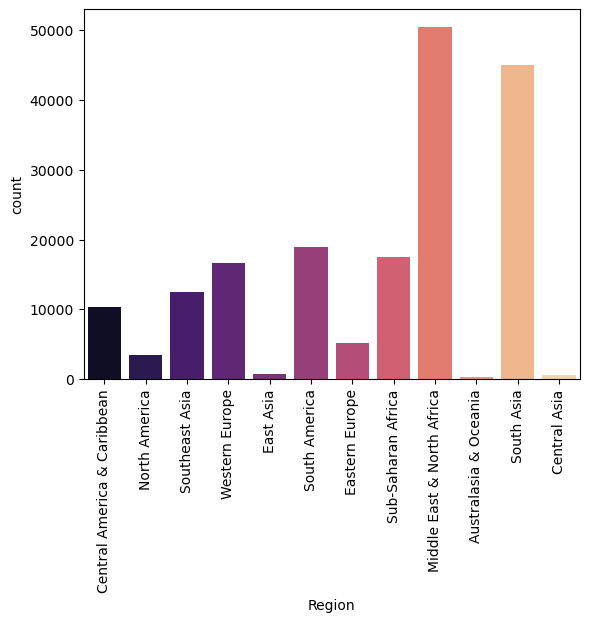

In [253]:
sb.countplot(x =df2['Region'], palette = color1);
plt.xticks(rotation = 90);

### The previous chart shows that the top region with terrorism attacks is the Middle East & North Africa

In [258]:
dangerous_countries = df2.groupby('Country')['Killed'].sum().nlargest(25).index


In [263]:
top15 = df2[df2['Country'].isin(dangerous_countries)]
df_top15 = top15.groupby('Country')[['Killed', 'Wounded']].sum().reset_index()


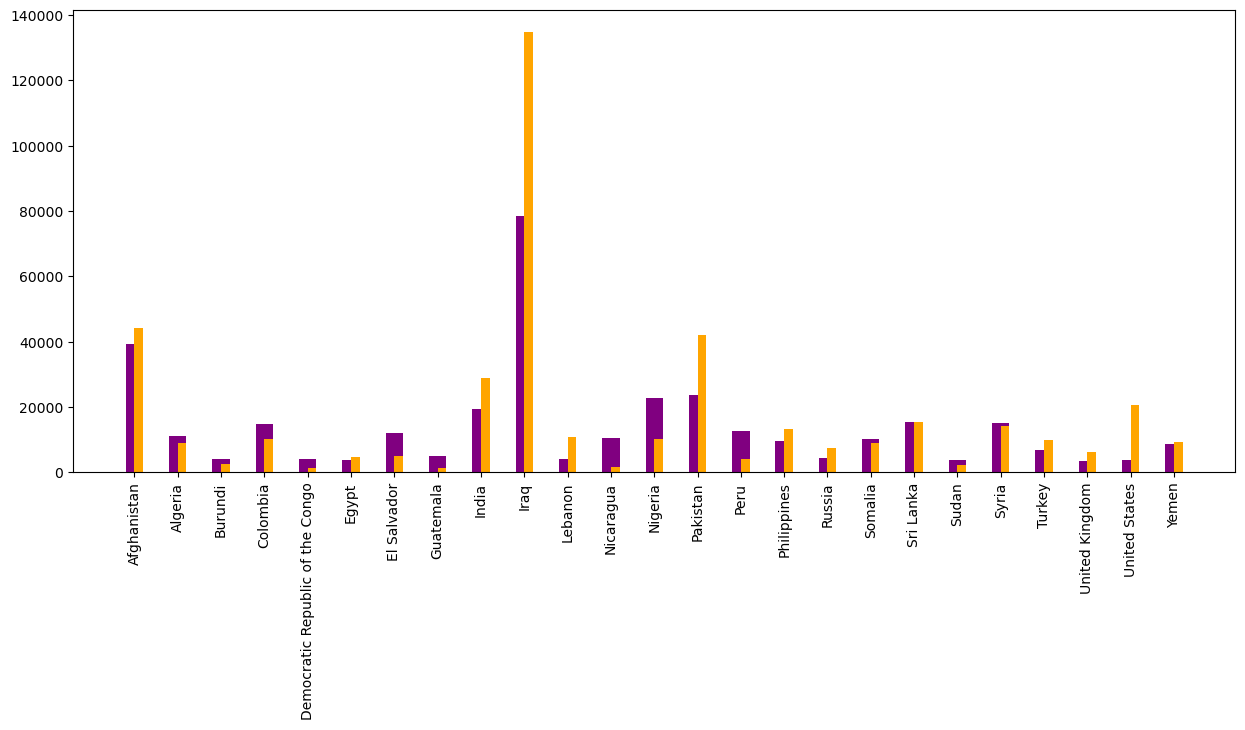

In [262]:
plt.figure(figsize = (15,6));
color2 = plt.colormaps()[0]
plt.bar(df_top15['Country'],df_top15['Killed'],align = 'center', width = 0.4, color = 'purple');
plt.bar(df_top15['Country'],df_top15['Wounded'], align = 'edge', width = 0.2, color = 'orange');
plt.xticks(rotation = 90);

### Due to the preceding plot we've the top 25 countries in kills and it represent the wounded in orange bars and kills in purple bars also noted that "Iraq" has the biggest number of wounds and kills as well. 